In [1]:
import pandas as pd
pd.options.display.max_rows= 200
pd.options.display.max_columns = 200

In [2]:
df_gini = pd.read_csv("../data/gini.csv")

In [3]:
df_gpg = pd.read_csv("../data/gpg.csv")

In [4]:
df_ict = pd.read_csv("../data/ict_clean.csv")

In [5]:
df_gini.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,INCOMEINEQ,GINI,INEQ,A,2012,0.326,NaN
1,AUS,INCOMEINEQ,GINI,INEQ,A,2014,0.337,NaN
2,AUS,INCOMEINEQ,GINI,INEQ,A,2016,0.330,NaN
3,AUT,INCOMEINEQ,GINI,INEQ,A,2007,0.284,NaN
4,AUT,INCOMEINEQ,GINI,INEQ,A,2008,0.281,NaN


In [6]:
df_gpg.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,WAGEGAP,EMPLOYEE,PC,A,2005,15.777778,NaN
1,AUS,WAGEGAP,EMPLOYEE,PC,A,2006,16.666667,NaN
2,AUS,WAGEGAP,EMPLOYEE,PC,A,2007,15.400000,NaN
3,AUS,WAGEGAP,EMPLOYEE,PC,A,2008,11.937378,NaN
4,AUS,WAGEGAP,EMPLOYEE,PC,A,2009,16.363636,NaN


In [7]:
df_gini.drop(['INDICATOR', "MEASURE", "FREQUENCY", "Flag Codes", "SUBJECT"], axis=1, inplace=True)

In [8]:
df_gpg.drop(['INDICATOR', "MEASURE", "FREQUENCY", "Flag Codes", "SUBJECT"], axis=1, inplace=True)

In [9]:
df_gini.columns = map(str.lower, df_gini.columns)

In [10]:
df_gpg.columns = map(str.lower, df_gpg.columns)

In [11]:
df_gpg = df_gpg.rename(columns={"value": "gender_pay_gap"})

In [12]:
df_gini = df_gini.rename(columns={"value": "gini"})

In [13]:
df_gini.to_csv("../data/gini_clean.csv")
df_gpg.to_csv("../data/gpg_clean.csv")

In [14]:
df = pd.merge(left=df_gpg, right=df_gini, how='left', left_on=('location', 'time'), right_on=('location', 'time'))

In [15]:
df.head()

,location,time,gender_pay_gap,gini
0,AUS,2005,15.777778,NaN
1,AUS,2006,16.666667,NaN
2,AUS,2007,15.400000,NaN
3,AUS,2008,11.937378,NaN
4,AUS,2009,16.363636,NaN


In [16]:
df.groupby(['location']).count()

,time,gender_pay_gap,gini
location,,,
AUS,14,14,3
AUT,13,13,10
BEL,12,12,12
CAN,14,14,13
CHE,6,6,5
CHL,6,6,5
CZE,14,14,12
DEU,13,13,7
DNK,13,13,6


In [17]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

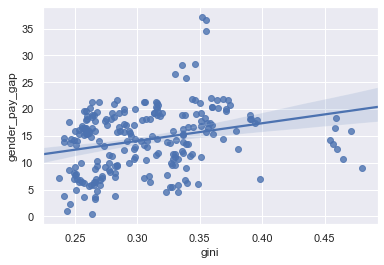

In [18]:
ax = sns.regplot(x="gini", y="gender_pay_gap", data=df)

In [19]:
#df_ict = pd.read_csv("data/ict.csv")

df_ict.reset_index(drop=True)

,Unnamed: 0,time,location,prct_f_employed_ICT
0,3,2009,European Union - 28 countries (2013-2020),22.2
1,7,2009,European Union - 27 countries (from 2020),21.9
2,11,2009,European Union - 15 countries (1995-2004),20.0
3,15,2009,Euro area - 19 countries (from 2015),19.3
4,19,2009,BEL,15.8
...,...,...,...,...
385,1543,2018,CHE,14.5
386,1547,2018,MNE,NaN
387,1551,2018,North Macedonia,20.7
388,1555,2018,SRB,19.1


In [20]:
df = pd.merge(left=df, right=df_ict, how='left', left_on=('location', 'time'), right_on=('location', 'time'))

In [21]:
df.head(200)

,location,time,gender_pay_gap,gini,Unnamed: 0,prct_f_employed_ICT
0,AUS,2005,15.777778,NaN,NaN,NaN
1,AUS,2006,16.666667,NaN,NaN,NaN
2,AUS,2007,15.400000,NaN,NaN,NaN
3,AUS,2008,11.937378,NaN,NaN,NaN
4,AUS,2009,16.363636,NaN,NaN,NaN
5,AUS,2010,14.042934,NaN,NaN,NaN
6,AUS,2011,15.966387,NaN,NaN,NaN
7,AUS,2012,13.750000,0.326,NaN,NaN
8,AUS,2013,18.000000,NaN,NaN,NaN
9,AUS,2014,15.384615,0.337,NaN,NaN


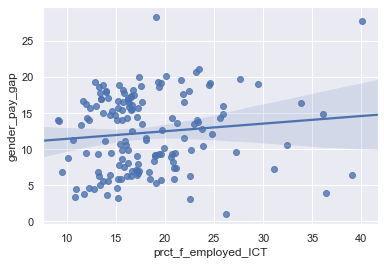

In [22]:
ax = sns.regplot(x="prct_f_employed_ICT", y="gender_pay_gap", data=df)

In [23]:
df.to_csv("../data/data_merged.csv")

In [24]:
df_reg = df[["location", "time", "gender_pay_gap", "prct_f_employed_ICT"]]

In [25]:
df_reg.dropna()

,location,time,gender_pay_gap,prct_f_employed_ICT
18,AUT,2009,19.355966,19.3
19,AUT,2010,19.188863,19.6
20,AUT,2011,18.550554,13.2
21,AUT,2012,18.185057,16.7
22,AUT,2013,18.053211,14.0
23,AUT,2014,17.728884,13.3
24,AUT,2015,17.043253,14.2
25,AUT,2016,15.670900,17.2
26,AUT,2017,15.382154,15.6
31,BEL,2009,7.480461,15.8


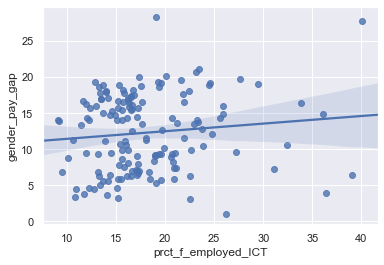

In [26]:
ax = sns.regplot(x="prct_f_employed_ICT", y="gender_pay_gap", data=df_reg)

In [32]:
pd.read_csv("../data/data_merged.csv").head(100)

,Unnamed: 0,location,time,gender_pay_gap,gini,Unnamed: 0.1,prct_f_employed_ICT
0,0,AUS,2005,15.777778,NaN,NaN,NaN
1,1,AUS,2006,16.666667,NaN,NaN,NaN
2,2,AUS,2007,15.400000,NaN,NaN,NaN
3,3,AUS,2008,11.937378,NaN,NaN,NaN
4,4,AUS,2009,16.363636,NaN,NaN,NaN
5,5,AUS,2010,14.042934,NaN,NaN,NaN
6,6,AUS,2011,15.966387,NaN,NaN,NaN
7,7,AUS,2012,13.750000,0.326,NaN,NaN
8,8,AUS,2013,18.000000,NaN,NaN,NaN
9,9,AUS,2014,15.384615,0.337,NaN,NaN
